---

# Gamaka Based Classification

---

### Pitch Standard Deviation
The pitch standard deviation serves as an indicator of **svaras** that exhibit **gamakas** (ornamentations).

In [1]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Load dataset

In [2]:
X = np.load('../dataset/stds.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [3]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73)
y shape: (36262, 40)


## Train-test split

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [5]:
static_input = keras.layers.Input(shape=(X.shape[1],))

In [8]:
x = keras.layers.Dense(512, activation='relu')(static_input)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(static_input, outputs=output)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 73)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │        37,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,416 (2.07 MB)

 Trainable params: 541,416 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [10]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50


I0000 00:00:1744328453.727921   43461 service.cc:146] XLA service 0x7fb9ec00e3b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744328453.728002   43461 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5


100/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0498 - loss: 3.6494

I0000 00:00:1744328459.795180   43461 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


794/794 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0612 - loss: 3.5587 - val_accuracy: 0.1182 - val_loss: 3.2977
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1246 - loss: 3.2453 - val_accuracy: 0.1537 - val_loss: 3.1370
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1622 - loss: 3.0663 - val_accuracy: 0.1701 - val_loss: 3.0408
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1847 - loss: 2.9169 - val_accuracy: 0.1829 - val_loss: 2.9927
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2124 - loss: 2.7850 - val_accuracy: 0.2054 - val_loss: 2.9211
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2486 - loss: 2.6532 - val_accuracy: 0.2158 - val_loss: 2.8912
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2829 - loss: 2.5165 - val_accuracy: 0.2160 - val_loss: 2.9062
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3062 - loss: 2.4152 - val_accuracy: 0.2261 - val

## Test

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2761 - loss: 4.4110


In [12]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 27.59


In [13]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [14]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.2511725345217474


In [15]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

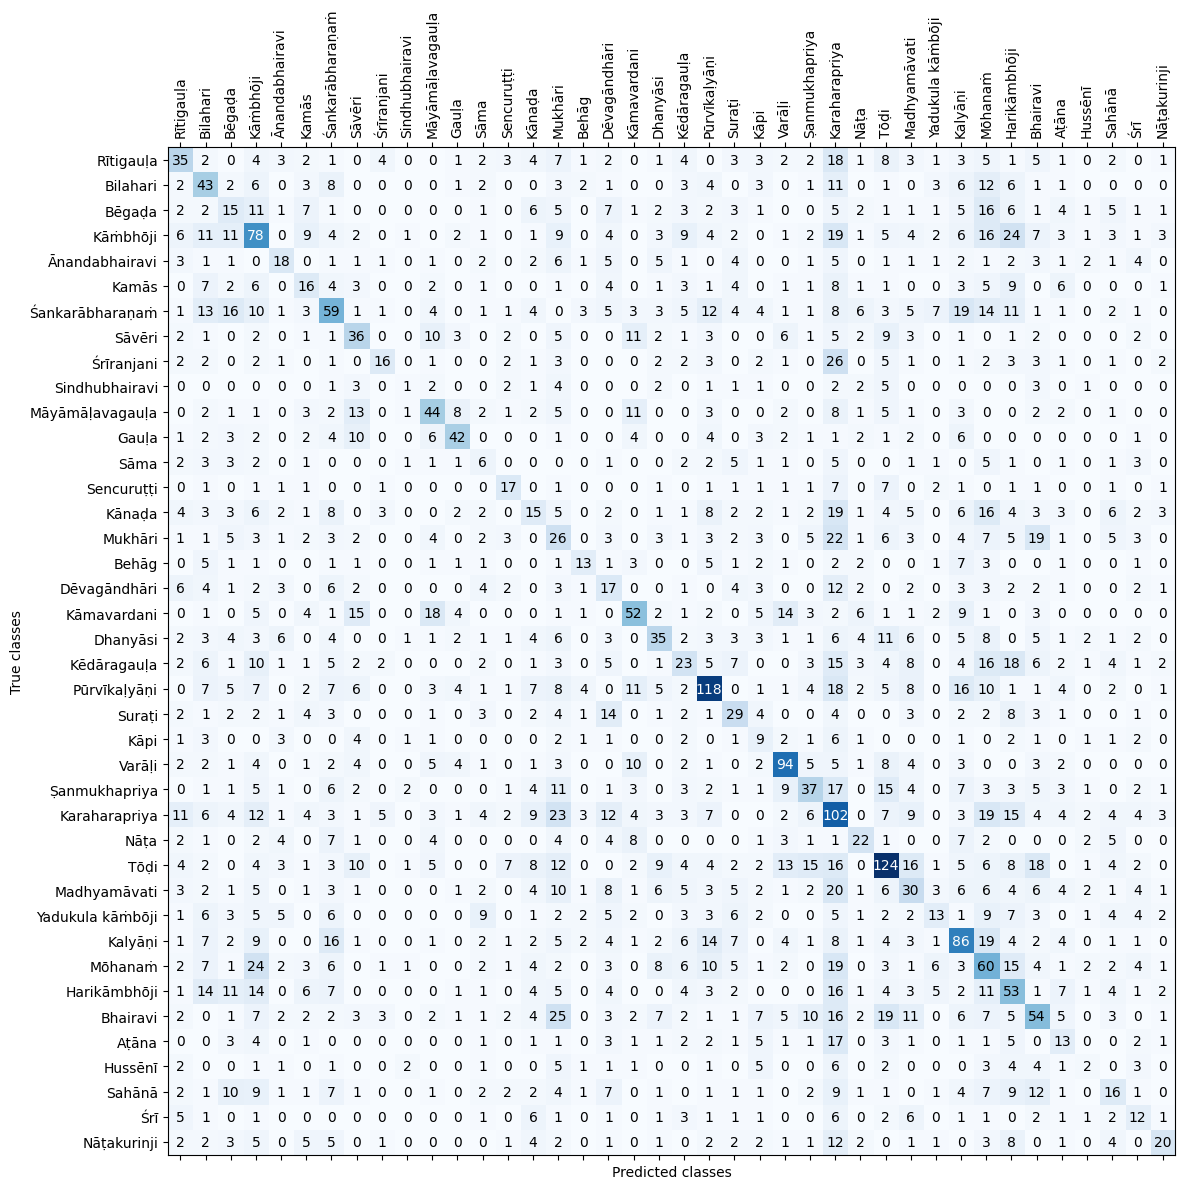

In [16]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_stds.png', dpi=300)
plt.tight_layout()
plt.show()